In [1]:
#!pip install ecmwf-data ecmwf-opendata magpye

In [2]:
import ecmwf.data as ecdata
from magpye import GeoMap
from ecmwf.opendata import Client

In [3]:
client = Client("ecmwf", beta=True)

In [4]:
parameters = ['10u', '10v']
filename = 'wind10.grib'
filename

'wind10.grib'

Setting date to 0 will download today's data. 
Removing date and time altogether from the request will download the latest data.  
Try commenting out date and time to download latest forecast!

In [5]:
stepS=[i for i in range(0, 144, 3)]

client.retrieve(
    date=-1,
    time=0,
    step=stepS,
    #stream="oper",
    type="fc",
    #levtype="sfc",
    param=parameters,
    target=filename
)

KeyError: 'ecmwf'

In [6]:
data = ecdata.read(filename)

FileNotFoundError: [Errno 2] No such file or directory: 'wind10.grib'

In [6]:
data.describe()

parameter,typeOfLevel,level,date,time,step,number,paramId,class,stream,type,experimentVersionNumber
10u,heightAboveGround,10,20220427,0,12,None,165,od,oper,fc,0001
10v,heightAboveGround,10,20220427,0,12,None,166,od,oper,fc,0001
2t,heightAboveGround,2,20220427,0,12,None,167,od,oper,fc,0001


In [7]:
data.describe('10u')

shortName,2t
name,2 metre temperature
paramId,167
units,K
typeOfLevel,heightAboveGround
level,2
date,20220427
time,0
step,12
number,None
class,od


In [8]:
data.ls()

,centre,shortName,typeOfLevel,level,dataDate,dataTime,stepRange,dataType,number,gridType
Message,,,,,,,,,,
0,ecmf,10v,heightAboveGround,10,20220427,0,12,fc,None,regular_ll
1,ecmf,10u,heightAboveGround,10,20220427,0,12,fc,None,regular_ll
2,ecmf,2t,heightAboveGround,2,20220427,0,12,fc,None,regular_ll


In [9]:
t2m = data.select(shortName= "2t")
u = data.select(shortName= "10u")
v = data.select(shortName= "10v")

t2m.describe()

parameter,typeOfLevel,level,date,time,step,number,paramId,class,stream,type,experimentVersionNumber
2t,heightAboveGround,2,20220427,0,12,None,167,od,oper,fc,0001


We need to convert the temperature from Kelvin to Celsius

In [10]:
t2m -= 273.15

And finally, we can plot the data on the map. 

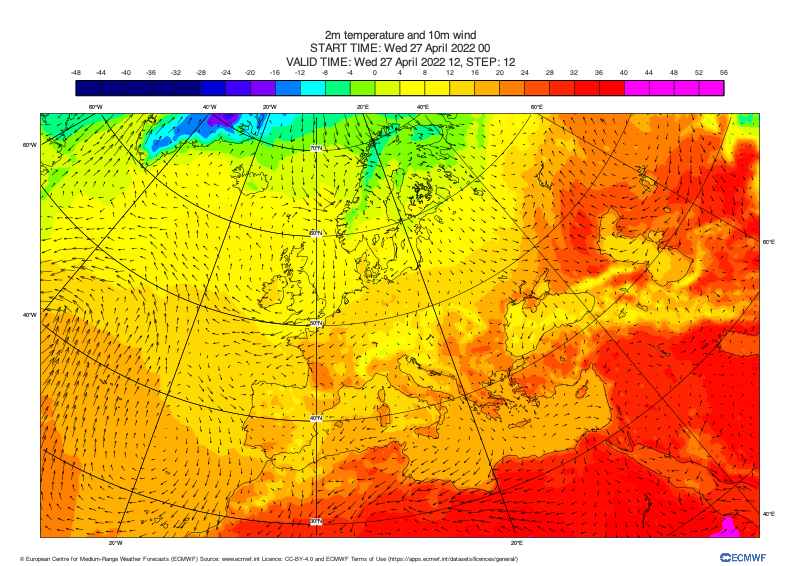

In [11]:
fig = GeoMap(area_name='south_east_asia_and_indonesia')

fig.contour_shaded(t2m, style="temperature_rainbow_3")
fig.arrows(u=u, v=v, wind_style="arrows", density=2, colour='black')

fig.coastlines(resolution="medium")
fig.gridlines()

fig.title(["2m temperature and 10m wind",
           "START TIME: <grib_info key='base-date' format='%a %d %B %Y %H' where='shortName=2t'/> ",
           "VALID TIME: <grib_info key='valid-date' format='%a %d %B %Y %H' where='shortName=2t' />, STEP: <grib_info key='step' where='shortName=2t'/>"])

fig.legend()
fig.footer("© European Centre for Medium-Range Weather Forecasts (ECMWF) Source: www.ecmwf.int Licence: CC-BY-4.0 and ECMWF Terms of Use (https://apps.ecmwf.int/datasets/licences/general/)", logo='ecmwf')

fig.show()

Note that plot produced using open data dataset will slightly differ from one from Open Charts. This is due to different resolution of the data.  
Open data is on 0.4x0.4 resolution, while high resolution data is 0.1x0.1 grid.